In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score, f1_score as f1_score_rep
import numpy as np
import pandas as pd
from time import time
from pathlib import Path

In [2]:
import numpy as np

x_test = np.load('/home/jovyan/Wustl_iiot/x_test.npy')
x_train = np.load('/home/jovyan/Wustl_iiot/x_train.npy')
x_val = np.load('/home/jovyan/Wustl_iiot/x_val.npy')
y_test = np.load('/home/jovyan/Wustl_iiot/y_test.npy')
y_train = np.load('/home/jovyan/Wustl_iiot/y_train.npy')
y_val = np.load('/home/jovyan/Wustl_iiot/y_val.npy')

In [3]:


# # 请确保已经加载了 x_train, y_train, x_test, y_test, x_val, y_val

# # 定义参数
# rf_params = {
#     'n_estimators': [10, 50, 100, 200],  # 树的数量
#     'max_depth': [5, 10, None],  # 树的最大深度
#     'min_samples_split': [2, 4],  # 分割所需的最小样本数
#     # 'min_samples_leaf': range(1, 21)  # 叶节点的最小样本数
# }

# # # 确保结果目录存在
# # result_dir = Path('/content/drive/MyDrive/Data/results')
# # if not result_dir.exists():
# #     result_dir.mkdir()

# def tune_with_halving_grid_search_rf(x_train, y_train, param_grid):
#     rf = RandomForestClassifier()

#     start = time()
#     halving_rf_results = HalvingGridSearchCV(
#         rf,
#         param_grid,
#         cv=5,
#         factor=2,
#         min_resources='exhaust',
#         scoring='accuracy'
#     ).fit(x_train, y_train)

#     duration = time() - start

#     results = pd.DataFrame(halving_rf_results.cv_results_)
#     # results.to_csv(result_dir / 'halving_rf_results.csv')

#     # 格式化和排序结果
#     results = results.loc[:, ('iter', 'rank_test_score', 'mean_test_score', 'params')]
#     results.sort_values(by=['iter', 'rank_test_score'], ascending=[False, True], inplace=True)

#     return results, duration

# # 使用验证数据集进行参数调整
# halving_results, halving_duration = tune_with_halving_grid_search_rf(x_val, y_val, rf_params)

# print(halving_results.head())

# # 获取最佳参数和分数
# best_score = halving_results['mean_test_score'].iloc[0]
# best_params = halving_results['params'].iloc[0]

# # 使用最佳参数训练随机森林模型
# best_rf = RandomForestClassifier(**best_params)
# best_rf.fit(x_train, y_train)

# # # 在测试集上评估
# # accuracy = accuracy_score(y_test, best_rf.predict(x_test))
# # micro_f1 = f1_score_rep(y_test, best_rf.predict(x_test), average="micro")
# # macro_f1 = f1_score_rep(y_test, best_rf.predict(x_test), average="macro")

# # # 打印结果
# # print(f'Best score for HalvingGridSearchCV is {best_score:.3f}, took {halving_duration:.2f} seconds')
# # print(f'Params: {best_params}')
# # print(f'Corresponding test accuracy: {accuracy * 100:.2f}%')
# # print("Micro F1 Score: ", micro_f1)
# # print("Macro F1 Score: ", macro_f1)

FPR: [1.25674979e-05 0.00000000e+00 6.49956072e-04 0.00000000e+00
 0.00000000e+00]
TPR: [1.         0.94230769 1.         0.91201456 1.        ]
FNR: [0.         0.05769231 0.         0.08798544 0.        ]
TNR: [0.99998743 1.         0.99935004 1.         1.        ]
Precision: 0.9848319203677928
Accuracy: 0.9993801125012042
F1-score: 0.9770378263263421
AUC: 0.9999998196936938
FPR: 0.00013250471397425686
tpr: 0.9708644510828977
fnr: 0.029135548917102315
tnr: 0.9998674952860258


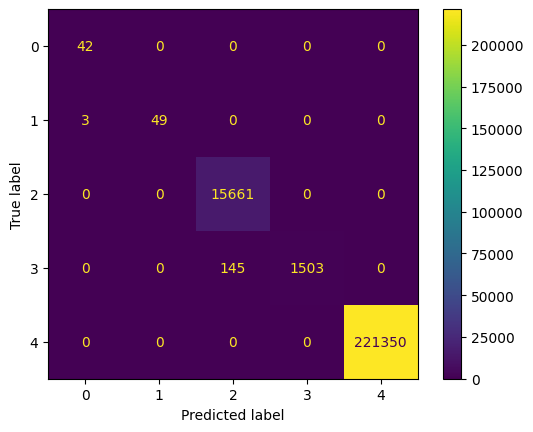

In [4]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.datasets import load_digits

best_rf = RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators= 200)
best_rf.fit(x_train, y_train)

y_pred = best_rf.predict(x_test)

conf_matrix = confusion_matrix(y_test, y_pred)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_pred, average='macro')
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='macro')
auc = roc_auc_score(y_test, best_rf.predict_proba(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=best_rf.classes_)
disp.plot()
plt.show()